<a href="https://colab.research.google.com/github/NikitaGalkinV/Data-Analyst-Yandex-Practicum-/blob/main/AB_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project A/B testing

## Project Description

**Task:** evaluate the results of an A/B test. You have a dataset with user actions, the terms of reference, and several auxiliary datasets at your disposal.

- Evaluate the correctness of the test.
- Analyze test results.
- Check the intersection of the test audience with the competing test;
- Check the coincidence of the test and marketing events, other problems of the time limits of the test.

**Plan:**

- Load data, fill missing data, analysis
- Correctness of the test
- EDA
- Statistical difference of fractions (z-criterion)
- Summary

## Data description

**ab_project_marketing_events.csv** - marketing events calendar for 2020;

File structure:
  
- name - name of the marketing event;
- regions - regions in which the advertising campaign will be held;
- start_dt - date when the campaign will start;
- end_dt - date when the campaign ends.

**final_ab_new_users.csv** - all users who registered in the online store from December 7 till December 21, 2020;

File structure:

- user_id - user ID;
- first_date - date of registration;
- region - region of the user;
- device - device from which the registration took place.

**final_ab_events.csv** - all events of new users in the period from December 7, 2020 to January 4, 2021;

File structure:
- user_id - user ID;
- event_dt - date and time of the event;
- event_name - type of event;
- details - additional data about the event. For example, for purchases, purchase, this field stores the cost of purchase in dollars.

**final_ab_participants.csv** - table of test participants.

Structure of the file:
- user_id - user ID;
- ab_test - test name;
- group - group of user.

## Data preprocessing

### Importing libraries and datasets

In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
from scipy import stats as st
import numpy as np
import plotly.io as pio
pio.renderers.default = 'png'
from scipy.stats import norm
!pip install Kaleido
!pip install -U kaleido

In [ ]:
marketing_events = pd.read_csv("/Users/nikitagalkin/Downloads/ab_project_marketing_events.csv")
new_users = pd.read_csv("/Users/nikitagalkin/Downloads/final_ab_new_users.csv")
events = pd.read_csv("/Users/nikitagalkin/Downloads/final_ab_events.csv")
participants = pd.read_csv("/Users/nikitagalkin/Downloads/final_ab_participants.csv")


### Preprocessing gaps, changing data types, removing duplicates

In [ ]:
def info(df):
    display(df.head())
    print("‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì")
    display(df.info())
    print("‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì")
    display(df.describe(include='all'))

#### Marketing Events Calendar (2020)

In [ ]:
info(marketing_events)

name                   regions    start_dt  \
0      Christmas&New Year Promo             EU, N.America  2020-12-25   
1  St. Valentine's Day Giveaway  EU, CIS, APAC, N.America  2020-02-14   
2        St. Patric's Day Promo             EU, N.America  2020-03-17   
3                  Easter Promo  EU, CIS, APAC, N.America  2020-04-12   
4             4th of July Promo                 N.America  2020-07-04   

    finish_dt  
0  2021-01-03  
1  2020-02-16  
2  2020-03-19  
3  2020-04-19  
4  2020-07-11

‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


None

‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì


name regions    start_dt   finish_dt
count                         14      14          14          14
unique                        14       6          14          14
top     Christmas&New Year Promo    APAC  2020-12-25  2021-01-03
freq                           1       4           1           1

In [ ]:
marketing_events['start_dt'] = pd.to_datetime(marketing_events['start_dt'])
marketing_events['finish_dt'] = pd.to_datetime(marketing_events['finish_dt'])

print('Duplicates in marketing_events:' ,marketing_events.duplicated().sum())
print()

display(marketing_events['name'])


Duplicates in marketing_events: 0



0             Christmas&New Year Promo
1         St. Valentine's Day Giveaway
2               St. Patric's Day Promo
3                         Easter Promo
4                    4th of July Promo
5            Black Friday Ads Campaign
6               Chinese New Year Promo
7     Labor day (May 1st) Ads Campaign
8      International Women's Day Promo
9      Victory Day CIS (May 9th) Event
10           CIS New Year Gift Lottery
11       Dragon Boat Festival Giveaway
12             Single's Day Gift Promo
13               Chinese Moon Festival
Name: name, dtype: object

####  All users registered in the online store from 7 to 21 December 2020

In [ ]:
info(new_users)

user_id  first_date     region   device
0  D72A72121175D8BE  2020-12-07         EU       PC
1  F1C668619DFE6E65  2020-12-07  N.America  Android
2  2E1BF1D4C37EA01F  2020-12-07         EU       PC
3  50734A22C0C63768  2020-12-07         EU   iPhone
4  E1BDDCE0DAFA2679  2020-12-07  N.America   iPhone

‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


None

‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì


user_id  first_date region   device
count              61733       61733  61733    61733
unique             61733          17      4        4
top     D72A72121175D8BE  2020-12-21     EU  Android
freq                   1        6290  46270    27520

In [ ]:
new_users['first_date'] = pd.to_datetime(new_users['first_date'])

print('Duplicates in new_users:' ,new_users.duplicated().sum())
print()

print('Regions:', new_users['region'].unique())


Duplicates in new_users: 0

Regions: ['EU' 'N.America' 'APAC' 'CIS']


#### All new user events between December 7, 2020 and January 4, 2021

In [ ]:
info(events)

user_id             event_dt event_name  details
0  E1BDDCE0DAFA2679  2020-12-07 20:22:03   purchase    99.99
1  7B6452F081F49504  2020-12-07 09:22:53   purchase     9.99
2  9CD9F34546DF254C  2020-12-07 12:59:29   purchase     4.99
3  96F27A054B191457  2020-12-07 04:02:40   purchase     4.99
4  1FD7660FDF94CA1F  2020-12-07 10:15:09   purchase     4.99

‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


None

‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì


user_id             event_dt event_name       details
count             440317               440317     440317  62740.000000
unique             58703               267268          4           NaN
top     A3917F81482141F2  2020-12-23 02:37:24      login           NaN
freq                  36                   10     189552           NaN
mean                 NaN                  NaN        NaN     23.877631
std                  NaN                  NaN        NaN     72.180465
min                  NaN                  NaN        NaN      4.990000
25%                  NaN                  NaN        NaN      4.990000
50%                  NaN                  NaN        NaN      4.990000
75%                  NaN                  NaN        NaN      9.990000
max                  NaN                  NaN        NaN    499.990000

In [ ]:
events['event_dt'] = pd.to_datetime(events['event_dt'])

print('Duplicates in events:' ,events.duplicated().sum())
print()

print('Events:', events['event_name'].unique())

events.groupby('event_name').agg({'details':'count'}).reset_index()


Duplicates in events: 0

Events: ['purchase' 'product_cart' 'product_page' 'login']


event_name  details
0         login        0
1  product_cart        0
2  product_page        0
3      purchase    62740

#### Table of test participants.

In [ ]:
info(participants)

user_id group                  ab_test
0  D1ABA3E2887B6A73     A  recommender_system_test
1  A7A3664BD6242119     A  recommender_system_test
2  DABC14FDDFADD29E     A  recommender_system_test
3  04988C5DF189632E     A  recommender_system_test
4  482F14783456D21B     B  recommender_system_test

‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB


None

‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì‚Äì


user_id  group            ab_test
count              18268  18268              18268
unique             16666      2                  2
top     0FDFDA0B2DEC2D91      A  interface_eu_test
freq                   2   9655              11567

In [ ]:
print('Duplicates in participants:' ,participants.duplicated().sum())

Duplicates in participants: 0


## Correctness of the test

**Technical specification**

- Test name: recommender_system_test;
- Groups: A (control), B (new payment funnel);
- Launch date: 2020-12-07;
- Date of stopping the recruitment of new users: 2020-12-21;
- Stop date: 2021-01-04;
- Audience: 15% of new users from the EU region;
- Purpose of the test: testing the changes associated with the introduction of an improved recommender system;
- Expected number of test participants: 6000.
- Expected effect: in 14 days from the moment of registration in the system, users will show an improvement in each metric by at least 10%:
     - conversions to view product cards ‚Äî product_page event
     - cart views - product_cart
     - purchases - purchases.

### Compliance of data with the requirements of the terms of reference

In [ ]:
# Test filter, leave only recommender_system_test
recommender_system_test = participants.query('ab_test== "recommender_system_test"')


In [ ]:
new_users.groupby(['region']).agg({'user_id': 'nunique'})


user_id
region            
APAC          3153
CIS           3155
EU           46270
N.America     9155

In [ ]:
# Leave only users from the EU
new_users_eu = (
    new_users.query('region == "EU"')
)

# Merge with new_users_eu
recommender_system_test = recommender_system_test.merge(
    new_users_eu[['user_id', 'first_date', 'region']],
    on='user_id')

In [ ]:
# Display the date when the recruitment of new users was stopped without time
print('End date:', events['event_dt'].max().date())
print("Days count:", (events['event_dt'].max() - events['event_dt'].min()).days)
print()

# –ü—Ä–æ–≤–µ—Ä—è–µ–º —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ –¥–∞—Ç
print('Enrollment start date:', recommender_system_test['first_date'].min().date())
print('End date for recruiting new users:', recommender_system_test['first_date'].max().date())




End date: 2020-12-30
Days count: 23

Enrollment start date: 2020-12-07
End date for recruiting new users: 2020-12-21


**Summary:**

- Date of start and end of recruitment in the AV test corresponds to
- Events were recorded only until 30.12, 5 days were not recorded.

In [ ]:
users = new_users[new_users['first_date'] <= '2020-12-21']


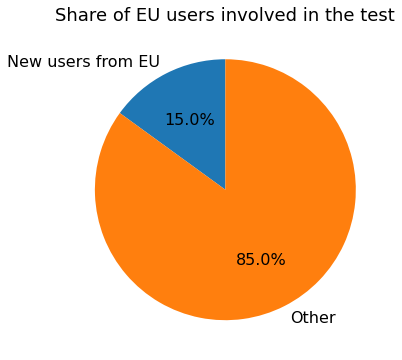

In [ ]:
prcnt = recommender_system_test['region'].value_counts()[0] / users['region'].value_counts()[0]

labels = ['New users from EU', 'Other']
sizes = [prcnt, 1 - prcnt]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 16})
ax.set_title('Share of EU users involved in the test', fontsize=18)
fig.set_size_inches(6, 6)

plt.show()

**Summary:**

- Share of users matched

In [ ]:
print('Count of participants:', recommender_system_test['user_id'].nunique())

Count of participants: 6351


**Summary:**

- The number of participants is 351 more than specified in the ToR

### Test time

In [ ]:
# Overlapping Marketing Events
marketing_events[(marketing_events['start_dt'] >= '2020-12-07') & (marketing_events['start_dt'] < '2020-12-30')]


name        regions   start_dt  finish_dt
0  Christmas&New Year Promo  EU, N.America 2020-12-25 2021-01-03

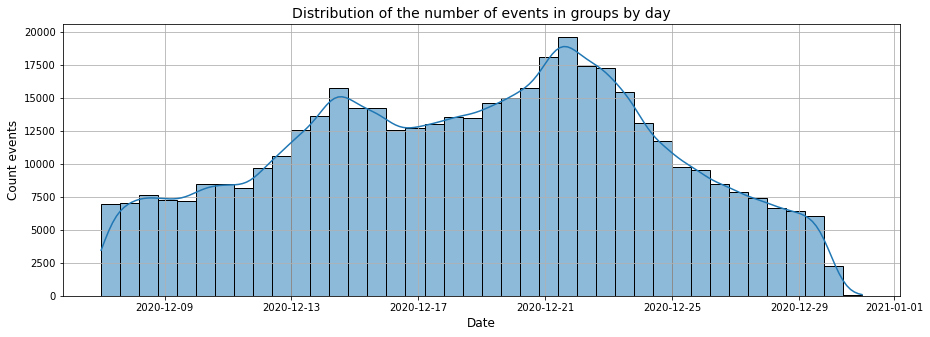

In [ ]:
# Build a graph of the distribution of the number of events in groups by day.
plt.figure(figsize=(15,5))
sns.histplot(data=events, x='event_dt', bins=40, kde=True, multiple='stack')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Count events', fontsize=12)
plt.title ('Distribution of the number of events in groups by day', fontsize=14)
plt.grid()
plt.show()

**–í—ã–≤–æ–¥:**

Events, holidays, etc. - affect the two groups equally. This is just a change in the quality of users, but the relative conversion of group B to group A will not have an impact. But this must be taken into account when studying absolute data.

### –ê—É–¥–∏—Ç–æ—Ä–∏—è —Ç–µ—Å—Ç–∞

In [ ]:
print('Tests:', participants['ab_test'].unique())


Tests: ['recommender_system_test' 'interface_eu_test']


In [ ]:
count = participants.groupby('user_id').agg({'ab_test':'nunique'}).query('ab_test > 1').count()[0]
print(f"Count of users who participated in both tests: {count}")

Count of users who participated in both tests: 1602


In [ ]:
interface_eu_test_users = (
    participants
    .query('ab_test == "interface_eu_test"')['user_id']
)


recommender_system_test = (
    recommender_system_test
    .query('user_id not in @interface_eu_test_users')
)


In [ ]:
recommender_system_test

user_id group                  ab_test first_date region
0     D1ABA3E2887B6A73     A  recommender_system_test 2020-12-07     EU
1     A7A3664BD6242119     A  recommender_system_test 2020-12-20     EU
4     482F14783456D21B     B  recommender_system_test 2020-12-14     EU
5     4FF2998A348C484F     A  recommender_system_test 2020-12-20     EU
6     7473E0943673C09E     A  recommender_system_test 2020-12-16     EU
...                ...   ...                      ...        ...    ...
6345  A23B0A7FFF375BFF     B  recommender_system_test 2020-12-12     EU
6346  7C5C12FA1B5AB710     A  recommender_system_test 2020-12-21     EU
6347  91C3969B8A72B908     B  recommender_system_test 2020-12-09     EU
6348  E26F13A65CEAC6EA     A  recommender_system_test 2020-12-17     EU
6350  80712ED4EA1B52A5     A  recommender_system_test 2020-12-14     EU

[4749 rows x 5 columns]

<div class="alert alert-block alert-warning">üìù
    

__–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π –æ—Ç —Ç–∏–º–ª–∏–¥–∞ ‚Ññ1__
    
–í–µ—Ä–Ω–æ–µ –Ω–∞–±–ª—é–¥–µ–Ω–∏–µ.    
    
–í –¥–∞–Ω–Ω–æ–π —Å–∏—Ç—É–∞—Ü–∏–∏, –Ω–∞–∏–±–æ–ª–µ–µ –∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã–º —Ä–µ—à–µ–Ω–∏–µ–º –±—É–¥–µ—Ç –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –≤ –∫–∞–∫–∏–µ –∏–º–µ–Ω–Ω–æ –≥—Ä—É–ø–ø—ã —Ç–µ—Å—Ç–∞ interface_eu_test –ø–æ–ø–∞–ª–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ —Ç–µ—Å—Ç–∞ recommender_system_test. –í–µ–¥—å –µ—Å–ª–∏ –æ–Ω–∏ –ø–æ–ø–∞–ª–∏ —Ç–æ–ª—å–∫–æ –≤ –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω—É—é –≥—Ä—É–ø–ø—É - —ç—Ç–æ –∑–Ω–∞—á–∏—Ç, —á—Ç–æ —Ç–µ—Å—Ç interface_eu_test –Ω–∏–∫–∞–∫ –Ω–∞ –Ω–∏—Ö –Ω–µ –ø–æ–≤–ª–∏—è–ª
</div>

In [ ]:
recommender_system_test_events = recommender_system_test.merge(
    events[['user_id', 'event_dt', 'event_name', 'details']],
    on='user_id',
    how='left')


In [ ]:
recommender_system_test_events.groupby('user_id').agg({'ab_test':'nunique'}).query('ab_test > 1').count()

ab_test    0
dtype: int64

In [ ]:
# Users participating in two groups
(
    recommender_system_test_events
    .groupby('user_id')
    .agg({'group': 'nunique'})
    .query('group > 1')
    .count()
)

group    0
dtype: int64

In [ ]:
# calculate the lifetime of the client.
recommender_system_test_events['lifetime'] = \
        (recommender_system_test_events['event_dt'] - recommender_system_test_events['first_date']).dt.days



In [ ]:
recommender_system_test_events = recommender_system_test_events.query('lifetime <= 14')
print('Count of participants:', recommender_system_test_events['user_id'].nunique())

Count of participants: 2594


In [ ]:
recommender_system_test_events

user_id group                  ab_test first_date region  \
0      D1ABA3E2887B6A73     A  recommender_system_test 2020-12-07     EU   
2      D1ABA3E2887B6A73     A  recommender_system_test 2020-12-07     EU   
4      D1ABA3E2887B6A73     A  recommender_system_test 2020-12-07     EU   
6      D1ABA3E2887B6A73     A  recommender_system_test 2020-12-07     EU   
8      A7A3664BD6242119     A  recommender_system_test 2020-12-20     EU   
...                 ...   ...                      ...        ...    ...   
19676  80712ED4EA1B52A5     A  recommender_system_test 2020-12-14     EU   
19677  80712ED4EA1B52A5     A  recommender_system_test 2020-12-14     EU   
19678  80712ED4EA1B52A5     A  recommender_system_test 2020-12-14     EU   
19679  80712ED4EA1B52A5     A  recommender_system_test 2020-12-14     EU   
19680  80712ED4EA1B52A5     A  recommender_system_test 2020-12-14     EU   

                 event_dt    event_name  details  lifetime  
0     2020-12-07 14:43:27      purchase    99.99       0.0  
2     2020-12-07 14:43:29  product_cart      NaN       0.0  
4     2020-12-07 14:43:27  product_page      NaN       0.0  
6     2020-12-07 14:43:27         login      NaN       0.0  
8     2020-12-20 15:46:06  product_page      NaN       0.0  
...                   ...           ...      ...       ...  
19676 2020-12-15 20:10:06  product_page      NaN       1.0  
19677 2020-12-20 20:01:34  product_page      NaN       6.0  
19678 2020-12-14 05:48:50         login      NaN       0.0  
19679 2020-12-15 20:10:03         login      NaN       1.0  
19680 2020-12-20 20:01:32         login      NaN       6.0  

[17087 rows x 9 columns]

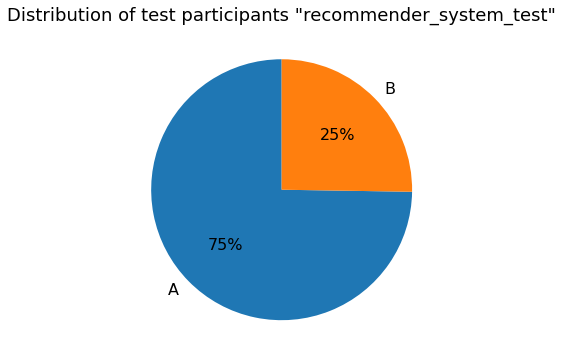

In [ ]:
unique_users = recommender_system_test_events.groupby('group')['user_id'].nunique()

labels = unique_users.index
sizes = unique_users.values
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.0f%%', startangle=90, textprops={'fontsize': 16})
ax.set_title('Distribution of test participants "recommender_system_test"', fontsize=18)
fig.set_size_inches(6, 6)
plt.show()

In [ ]:
unique_users

group
A    1939
B     655
Name: user_id, dtype: int64

**Things to consider:**
- Control the distribution of users between groups and tests
- Try to run tests outside of marketing campaigns
- The samples were large, in this case at least 6000 as stated
- Define metrics
- Write TK
- Define test duration
- Take into account other additional factors that may affect

**Conclusion:**

- In the samples, users are not evenly distributed, the ratio of A to I is 1 to 3
- Date of start and end of recruitment in the AV test corresponds to
- Events were recorded only until 12/30, 4 days were not recorded. Expected factor: New Year's festivities. You need to clarify the reasons for the failure
- Share of users matched
- The start of the marketing event had no effect
- The number of participants in the A / B test turned out to be 2 times less than in the TK
- 1600 users were included in 2 A/B tests

## EDA

### Number of events per user

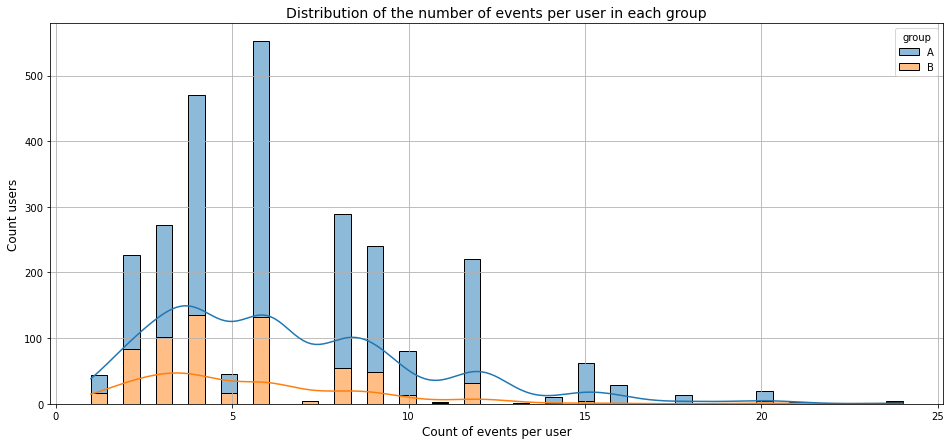

In [ ]:
users_per_day = recommender_system_test_events.groupby(['group', 'event_dt'])['user_id'].nunique().reset_index()

plt.figure(figsize=(16,7))
sns.histplot(data=recommender_system_test_events.groupby(['user_id', 'group']).size().reset_index(name='event_count'), x='event_count', hue='group', multiple='stack', kde=True, bins=50)
plt.xlabel('Count of events per user', fontsize=12)
plt.ylabel('Count users', fontsize=12)
plt.title('Distribution of the number of events per user in each group', fontsize=14)
plt.grid()
plt.show()

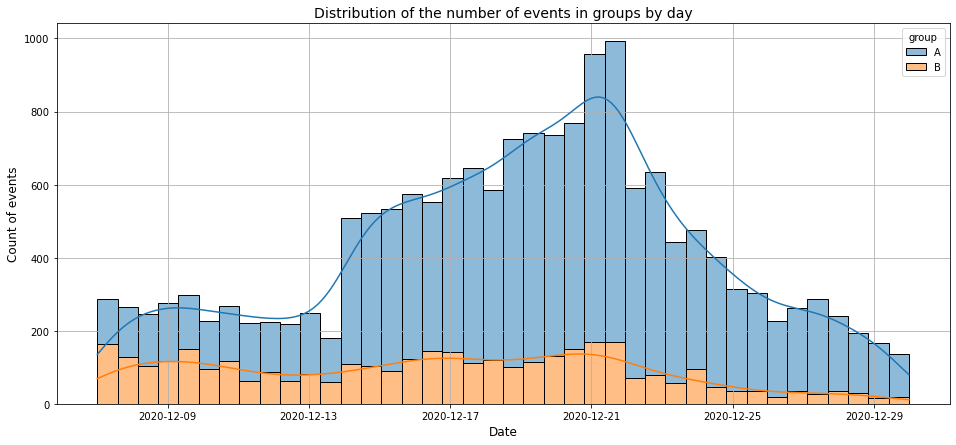

In [ ]:
# Build a graph of the distribution of the number of events in groups by day.
plt.figure(figsize=(16,7))
sns.histplot(data=recommender_system_test_events, x='event_dt', bins=40, hue='group', kde=True, multiple='stack')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Count of events', fontsize=12)
plt.title ('Distribution of the number of events in groups by day', fontsize=14)
plt.grid()
plt.show()

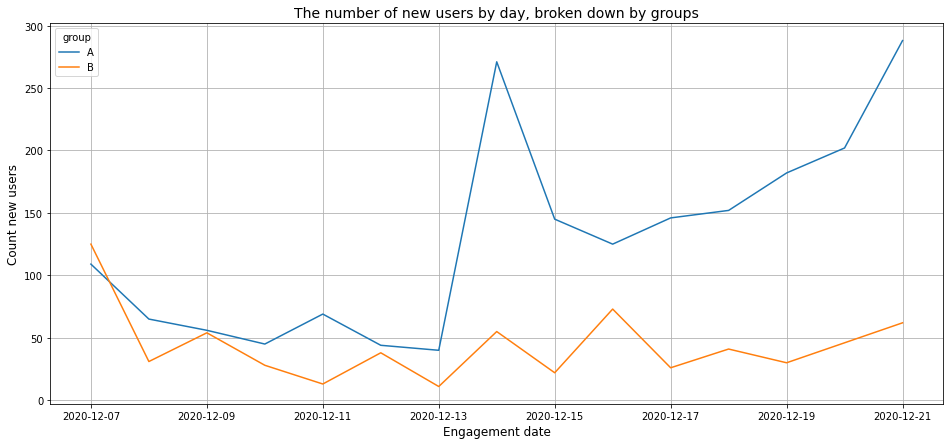

In [ ]:
users = recommender_system_test_events.groupby(['user_id', 'group'])['first_date'].min().reset_index()

new_users_by_day = users.groupby(['first_date', 'group'])['user_id'].count().reset_index()

plt.figure(figsize=(16,7))
sns.lineplot(data=new_users_by_day, x='first_date', y='user_id', hue='group')
plt.xlabel('Engagement date', fontsize=12)
        
plt.ylabel('Count new users', fontsize=12)
plt.title('The number of new users by day, broken down by groups', fontsize=14)
plt.grid()
plt.show()

**Summary:**

- Events are distributed with a significant difference, perhaps a large difference in groups affects
- There is a general growth dynamics from December 14 to December 21 and then a gradual decline
- from the 14th, a sharp jump in attracting new users, which influenced the jump in events in the same period

### Changing the conversion in the funnel in the samples at different stages

In [ ]:
unique_users

group
A    1939
B     655
Name: user_id, dtype: int64

In [ ]:
funnel_events = recommender_system_test_events.pivot_table(index='event_name', columns='group', values='user_id', aggfunc='nunique')\
                             .reindex(['login', 'product_page', 'product_cart', 'purchase'])\
                             .reset_index()
funnel_events['event_name'] = funnel_events['event_name'].replace({'product_page': '–°—Ç—Ä–∞–Ω–∏—Ü–∞ –ø—Ä–æ–¥—É–∫—Ç–∞', 'login': '–õ–æ–≥–∏–Ω',\
                                                'product_cart': '–ö–æ—Ä–∑–∏–Ω–∞','purchase': '–ü–æ–∫—É–ø–∫–∞'})

funnel_events


group         event_name     A    B
0                  –õ–æ–≥–∏–Ω  1939  654
1      –°—Ç—Ä–∞–Ω–∏—Ü–∞ –ø—Ä–æ–¥—É–∫—Ç–∞  1265  367
2                –ö–æ—Ä–∑–∏–Ω–∞   589  184
3                –ü–æ–∫—É–ø–∫–∞   613  191

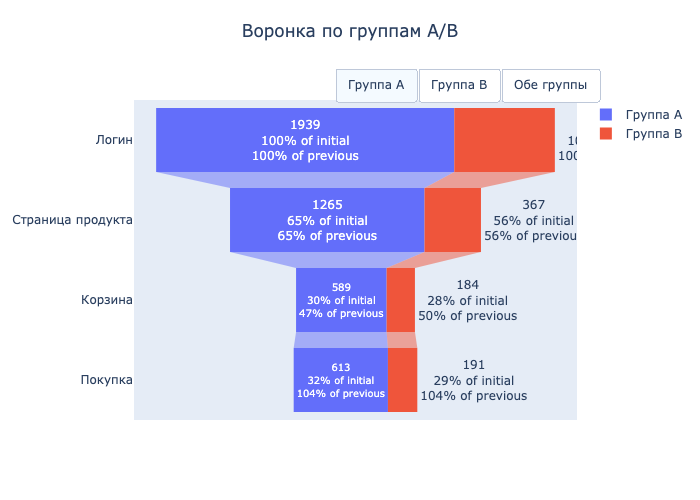

In [ ]:
# Create a funnel object for group A
fig = go.Figure(go.Funnel(
    name='–ì—Ä—É–ø–ø–∞ A',
    y = funnel_events['event_name'],
    x = funnel_events['A'],
    textposition = 'inside',
    textinfo = 'value+percent previous+percent initial'
))

# Add funnel object for group B
fig.add_trace(go.Funnel(
    name='–ì—Ä—É–ø–ø–∞ B',
    y = funnel_events['event_name'],
    x = funnel_events['B'],
    textposition = 'auto',
    textinfo = 'value+percent previous+percent initial'
))

# Set up the layout
fig.update_layout(
    title={
        'text': '–í–æ—Ä–æ–Ω–∫–∞ –ø–æ –≥—Ä—É–ø–ø–∞–º –ê/–í',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    updatemenus=[go.layout.Updatemenu(
        buttons=list([
            dict(
                args=[{'visible': [True, False]}],
                label="–ì—Ä—É–ø–ø–∞ A",
                method="update"
            ),
            dict(
                args=[{'visible': [False, True]}],
                label="–ì—Ä—É–ø–ø–∞ B",
                method="update"
            ),
            dict(
                args=[{'visible': [True, True]}],
                label="–û–±–µ –≥—Ä—É–ø–ø—ã",
                method="update"
            )
        ]),
        type="buttons",
        direction="right",
        showactive=True,
        x=1.05,
        y=1.1
    )]
)

fig.update_traces(hovertemplate='%{y}: %{x:.0f} <br>–î–æ–ª—è: %{percentInitial:.2%}')

fig.show()

**Summary:**
- The conversion in group A at all stages is higher than the conversion in group B
- Some users immediately buy without going to the cart

### Summary (What features of the data should be taken into account before proceeding with A/B testing?)

**Summary:**
- Events are distributed with a significant difference, perhaps a large difference in groups affects
- The general dynamics of growth is traced from December 13 to December 21 and then a gradual decline
- The conversion in group A at all stages is higher than the conversion in group B
- Do some users immediately buy without going to the cart?

**Things to consider:**
- Control the distribution of users between groups and tests
- Try to run tests outside of marketing campaigns
- The samples were large, in this case at least 6000 as stated
- Define metrics
- Write TK
- Define test duration
- Take into account other additional factors that may affect
- Make sure all data is accurate
- Do not start the test on December 31 at 10 pm

## A/B testing results

**Summary:**
- Events are distributed with a significant difference, perhaps a large difference in groups affects
- The general dynamics of growth is traced from December 13 to December 21 and then a gradual decline
- The conversion in group A at all stages is higher than the conversion in group B
- Do some users immediately buy without going to the cart?
- Users in test groups were distributed in violation of the terms of reference.
- Groups are unevenly divided, group A has more users.
- The number of users for the test is very small
- Users in group A commit more events than users in group B.
- Since the 14th, a sharp jump in attracting new users, which influenced the jump in events in the same period

## Statistical difference of fractions (z-criterion)

**Hypotheses:**
- H0: Group A and B conversion are equal.
- H1: Conversion groups A and B are not equal

In [ ]:

def z_test(first_group, second_group, alpha_value):
    alpha = alpha_value / 3 
    event_name = funnel_events['event_name']
    
    for i, event in enumerate(event_name[1:], start=1):
        n1, n2 = first_group[0], second_group[0]  
        x1, x2 = first_group[i], second_group[i]  
        
        
        
        p1, p2 = x1/n1, x2/n2  
        
        print(x1, x2, n1, n2)
        p_combined = (x1 + x2) / (n1 + n2)  
        
        z_value = (p1 - p2) / np.sqrt(p_combined * (1 - p_combined) * (1/n1 + 1/n2))
        
        p_value = 2 * (1 - norm.cdf(abs(z_value)))
        
        print(f"–°–æ–±—ã—Ç–∏–µ: {event}")
        print(f"p-value = {p_value:.3f}")
        if p_value < alpha:
            print("–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É")
        else:
            print("–ù–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É")
        print("")

In [ ]:
z_test(funnel_events['A'], funnel_events['B'], 0.05)


1265 367 1939 654
–°–æ–±—ã—Ç–∏–µ: –°—Ç—Ä–∞–Ω–∏—Ü–∞ –ø—Ä–æ–¥—É–∫—Ç–∞
p-value = 0.000
–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É

589 184 1939 654
–°–æ–±—ã—Ç–∏–µ: –ö–æ—Ä–∑–∏–Ω–∞
p-value = 0.278
–ù–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É

613 191 1939 654
–°–æ–±—ã—Ç–∏–µ: –ü–æ–∫—É–ø–∫–∞
p-value = 0.249
–ù–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É



**Sammury:**

- statistical test showed a significant difference in the Product Page event
- for the funnel steps Cart and Purchase, the statistical test showed no significant difference

## Summary

**Violations:**
- Users were unevenly distributed between groups:
     - A 1939
     -B655
- Users were simultaneously in 2 tests (1602 users)
- The test took place almost in parallel with a big marketing event
- The test ended ahead of schedule (30.12) - 4 days are missing
- The selection of users from different regions did not meet the requirements specification

As a result of all violations, the sample remained insignificant and with a large preponderance of group A, all these violations can lead to incorrect conclusion of the test results.


**Data exploration:**
- In group A, the number of events per user is higher
- Events by day are distributed differently
- A has a higher conversion rate than B


**Statistical analysis**

- statistical test showed a significant difference in the Product Page event
- for the funnel steps Cart and Purchase, the statistical test showed no significant difference


Testing was not carried out in accordance with the established TOR and numerous violations, at this stage it is not worth making decisions based on the results obtained. It is necessary to re-test, in accordance with the terms of reference.